## Reading the data 
### Operations Done
    * Reading from txt file
    * Splitting it to rows using regex
    * convert to DataFrame

In [1]:
import re
import pandas as pd

# Specify the path to your text file containing chat data
file_path = '_chat.txt'

# Initialize empty lists to store components
dates = []
times = []
usernames = []
messages = []

# Read data from the text file
with open(file_path, 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Extract components and store in lists
for line in chat_data:
    date_match = re.search(r'^\[(.*?)\]', line)
    if date_match:
        date_time_str = date_match.group(1)
        datetime_parts = re.split(r'[,\s]+', date_time_str)
        if len(datetime_parts) == 3:
            date, time, am_pm = datetime_parts
            dates.append(date)
            times.append(time + " " + am_pm)
        else:
            dates.append(None)
            times.append(None)
        
        match = re.search(r'\]\s(.*?):\s', line)
        if match:
            username = match.group(1)
            usernames.append(username)
            message = re.sub(r'^\[(.*?)\]', '', line).strip()
            messages.append(message)
        else:
            usernames.append(None)
            messages.append(None)
    else:
        dates.append(None)
        times.append(None)
        usernames.append(None)
        messages.append(None)

# Create a pandas DataFrame
data = {
    'Date': dates,
    'Time': times,
    'Username/Number': usernames,
    'Message': messages
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


           Date         Time              Username/Number   
0      28/04/23  11:02:30 AM  CodeSapiens - Code 'Seivom'  \
1      28/04/23  11:02:30 AM              Product Manager   
2      28/04/23  11:03:11 AM  CodeSapiens - Code 'Seivom'   
3      28/04/23  11:06:18 AM  CodeSapiens - Code 'Seivom'   
4      28/04/23  11:08:21 AM  CodeSapiens - Code 'Seivom'   
...         ...          ...                          ...   
10023  01/10/23   1:32:54 PM            ‪+91 99441 40269‬   
10024  01/10/23   1:57:53 PM                   ~ Mr.Coder   
10025  01/10/23   1:58:48 PM                   ~ Mr.Coder   
10026  01/10/23   1:59:34 PM                   ~ Mr.Coder   
10027  01/10/23   2:19:39 PM            ‪+91 93610 85806‬   

                                                 Message  
0      CodeSapiens - Code 'Seivom': ‎Messages and cal...  
1      Product Manager: ‎Product Manager created this...  
2      CodeSapiens - Code 'Seivom': ‎Product Manager ...  
3      CodeSapiens - Code 'Seiv

## Basic EDA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Checking the shape of the DataFrame
df.shape

(10028, 4)

In [4]:
## Displaying the basic info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10028 entries, 0 to 10027
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             5763 non-null   object
 1   Time             5763 non-null   object
 2   Username/Number  5763 non-null   object
 3   Message          5763 non-null   object
dtypes: object(4)
memory usage: 313.5+ KB


In [5]:
## Displaying Basic statistical Description about the DataFrame
df.describe(include='all')

,Date,Time,Username/Number,Message
count,5763,5763,5763,5763
unique,93,4802,1007,5514
top,03/09/23,7:07:44 AM,ThiyagaB,ThiyagaB: ‎POLL:
freq,341,11,1218,20


In [6]:
## Displaying the head of the DF
df.head()

,Date,Time,Username/Number,Message
0,28/04/23,11:02:30 AM,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎Messages and cal...
1,28/04/23,11:02:30 AM,Product Manager,Product Manager: ‎Product Manager created this...
2,28/04/23,11:03:11 AM,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎Product Manager ...
3,28/04/23,11:06:18 AM,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎You changed this...
4,28/04/23,11:08:21 AM,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎You changed the ...


In [7]:
## Printing number of unique values present in each column
df.nunique()

Date                 93
Time               4802
Username/Number    1007
Message            5514
dtype: int64

In [8]:
## Getting the unique values to check for values other than dates
df['Date'].unique()

array(['28/04/23', '05/05/23', None, '06/05/23', '08/05/23', '09/05/23',
       '10/05/23', '11/05/23', '13/05/23', '14/05/23', '18/05/23',
       '20/05/23', '21/05/23', '23/05/23', '26/05/23', '28/05/23',
       '29/05/23', '01/06/23', '03/06/23', '04/06/23', '05/06/23',
       '06/06/23', '07/06/23', '09/06/23', '10/06/23', '11/06/23',
       '12/06/23', '14/06/23', '16/06/23', '17/06/23', '23/06/23',
       '24/06/23', '08/07/23', '01/08/23', '02/08/23', '04/08/23',
       '05/08/23', '06/08/23', '07/08/23', '08/08/23', '09/08/23',
       '10/08/23', '11/08/23', '12/08/23', '13/08/23', '14/08/23',
       '15/08/23', '16/08/23', '17/08/23', '18/08/23', '19/08/23',
       '20/08/23', '21/08/23', '22/08/23', '23/08/23', '24/08/23',
       '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23',
       '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23',
       '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23',
       '09/09/23', '10/09/23', '11/09/23', '12/09/23', '

In [9]:
## Converting the column from "Object" to "DateTime"
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

In [10]:
## Checking if changes have made to DF using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10028 entries, 0 to 10027
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5763 non-null   datetime64[ns]
 1   Time             5763 non-null   object        
 2   Username/Number  5763 non-null   object        
 3   Message          5763 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 313.5+ KB


## Gathering Info about Users

In [11]:
# Get unique values in the 'Username/Number' column
unique_values = df['Username/Number'].unique()

# Print the unique values
for value in unique_values:
    print(value)

CodeSapiens - Code 'Seivom'
Product Manager
‪+91 86109 86964‬
~ Harisangar A P
~ 👑
~ Tryphosa Evangeline
~ Shandhini Mohankumar
~ Sri❤️
~ S Divya Darsshini ✨😇
~ .^.
~ 𝓟𝓸𝓸𝓻𝓷𝓪....
~ Monzzz🍷
~ (⁠◠⁠‿⁠◕⁠)
~ ~ Bhuva 🖤
~ Sowmiya Saravanan
~ Harish.EA
‪+91 90257 16650‬
~ SIVASARAN
~ Sanjay Saravanan
~ .
~ Keerthana✨✌🏻
~ Sanjena. G
~ Madhubaalika
~ Prashant.SS
~ swetha
~ Pooja 💙✨
~ KAVS✨
~ ~mathi✨
~ Loki Skywalker
ThiyagaB
~ Arun
~ P M  Kiruthiga
~ Sivanipriya🦋
~ karthick
~ Keerthi❣❣
~ M. Ilampirai
~ Karan
~ Lingeshwaran.V
~ Abishek💙❤️
~ Karthick
~ Vignesh
~ ꧁ℱ࿆ⷨ༒mohan༒ℱ࿆ⷨ꧂,
~ VINOTH
None
~ Karthi
~ °°°°••🖤••°°°°
~ ✨
‪+91 97150 56251‬
~ Naren
Ganesh SG INDIA
‪+91 96593 39945‬
~ Nisha🖤
~ Swetha
‪+91 74486 61633‬
~ ^_^
~ Sharu
Vinith Walmart
Koushik PEC
~ ...
‪+65 8819 8327‬
~ Srini
~ Adithya🖤
~ ROHITH B ⚽❤
~ SK
~ S.Vairaperumal
~ Shakith. A
~ Shunmathi
~ yuvapriya245
~ Yukta
~ Dukatu
~ Nanda Kumaran
~ Lokesh :)
~ Sowmya😎❤️
~ Pavithra
~ Mathumitha Mathiyalagan
~ Ahalya VS
~ Nathin kishore T
~ Rei

In [12]:
## Printing total unique users in data
len(unique_values)

1008

In [13]:
## Getting count of messages sent by user
count = df['Username/Number'].value_counts()
print(count)

Username/Number
ThiyagaB             1218
Koushik PEC           436
~ ^_^                 312
~ Shankar Sai         192
~ Fadhil              146
                     ... 
~ Jayasri               1
‪+91 93613 21901‬       1
~ PVVishal              1
~ Vasundaraa            1
‪+91 93610 85806‬       1
Name: count, Length: 1007, dtype: int64


In [14]:
## Getting the unique for no. of times messages sent by a unique user
count.unique()

array([1218,  436,  312,  192,  146,  145,  111,   87,   84,   72,   61,
         55,   53,   49,   47,   45,   44,   42,   41,   38,   35,   32,
         28,   26,   25,   24,   23,   22,   21,   20,   19,   18,   17,
         16,   15,   14,   13,   12,   11,   10,    9,    8,    7,    6,
          5,    4,    3,    2,    1], dtype=int64)

In [15]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Percentage of Messages sent by User

C:\Users\imyad\AppData\Local\Temp\ipykernel_18512\4095847584.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_users.loc[len(top_users)] = ['Others', other_users_count, other_users['Percentage'].sum()]


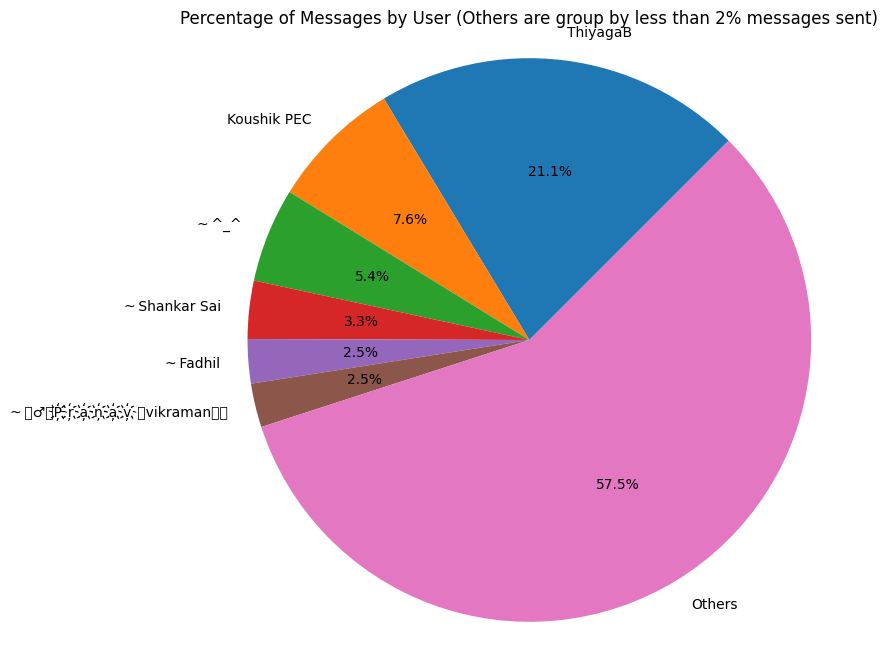

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the total message count
total_messages = df['Username/Number'].count()

# Calculate the message count and percentage for each user
message_counts = df['Username/Number'].value_counts().reset_index()
message_counts.columns = ['Username/Number', 'Count']
message_counts['Percentage'] = (message_counts['Count'] / total_messages) * 100

# Sort the message_counts DataFrame by Count in descending order
message_counts = message_counts.sort_values(by='Count', ascending=False)

# Threshold for aggregating users with less than 2% into 'Others'
threshold = 2

# Create a new DataFrame to aggregate users with less than the threshold
top_users = message_counts[message_counts['Percentage'] >= threshold]
other_users = message_counts[message_counts['Percentage'] < threshold]

# Aggregate users with less than the threshold into 'Others'
other_users_count = other_users['Count'].sum()
top_users.loc[len(top_users)] = ['Others', other_users_count, other_users['Percentage'].sum()]

# Create a pie chart with labels at 45-degree angle
plt.figure(figsize=(8, 8))
plt.pie(top_users['Count'], labels=top_users['Username/Number'], autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.title('Percentage of Messages by User (Others are group by less than 2% messages sent)')
plt.show()


## There was no null / missing values but the empty records was considered as nulls
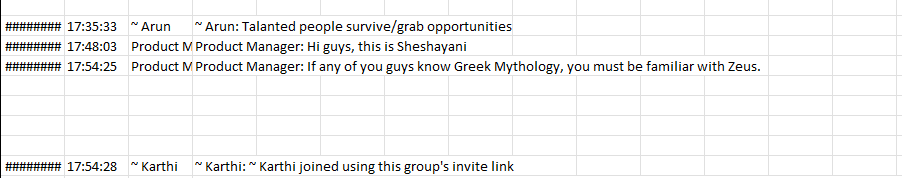

In [17]:
## Considering the above markdown, we drop the records with no data
df = df.dropna()

In [18]:
## Displaying the head after dropping
df.head()

,Date,Time,Username/Number,Message
0,2023-04-28,11:02:30 AM,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎Messages and cal...
1,2023-04-28,11:02:30 AM,Product Manager,Product Manager: ‎Product Manager created this...
2,2023-04-28,11:03:11 AM,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎Product Manager ...
3,2023-04-28,11:06:18 AM,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎You changed this...
4,2023-04-28,11:08:21 AM,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎You changed the ...


In [19]:
## Printing basic info after dropping the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5763 entries, 0 to 10027
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5763 non-null   datetime64[ns]
 1   Time             5763 non-null   object        
 2   Username/Number  5763 non-null   object        
 3   Message          5763 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 225.1+ KB


## Getting useful info with the **TIME** Feature

In [20]:
## Printing the Time feature
df['Time']

0        11:02:30 AM
1        11:02:30 AM
2        11:03:11 AM
3        11:06:18 AM
4        11:08:21 AM
            ...     
10023     1:32:54 PM
10024     1:57:53 PM
10025     1:58:48 PM
10026     1:59:34 PM
10027     2:19:39 PM
Name: Time, Length: 5763, dtype: object

## Transforming the Time Feature suitable for **Time Series Analysis**

In [21]:
# Remove "AM" and "PM" from the 'Time' column if present
df['Time'] = df['Time'].str.replace(r' AM| PM', '', regex=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Convert the 'Time' column to datetime format (as time only)
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S', errors='coerce').dt.time

# Create a new datetime column by combining 'Date' and 'Time'
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Drop the original 'Date' and 'Time' columns if you don't need them
df.drop(columns=['Date', 'Time'], inplace=True)

# Set 'Datetime' as the index (important for time series analysis)
df.set_index('Datetime', inplace=True)


In [22]:
## Displaying head after conversion
df.head()

,Username/Number,Message
Datetime,,
2023-04-28 11:02:30,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎Messages and cal...
2023-04-28 11:02:30,Product Manager,Product Manager: ‎Product Manager created this...
2023-04-28 11:03:11,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎Product Manager ...
2023-04-28 11:06:18,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎You changed this...
2023-04-28 11:08:21,CodeSapiens - Code 'Seivom',CodeSapiens - Code 'Seivom': ‎You changed the ...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5763 entries, 2023-04-28 11:02:30 to 2023-10-01 02:19:39
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Username/Number  5763 non-null   object
 1   Message          5763 non-null   object
dtypes: object(2)
memory usage: 135.1+ KB


### Finding the Day with maximum number of messages

In [24]:
# Group by date and count the number of messages for each date
daily_message_counts = df.groupby(df.index.date)['Username/Number'].count()

# Find the date with the most messages
most_messages_date = daily_message_counts.idxmax()
most_messages_count = daily_message_counts.max()

print(f"The day with the most messages is {most_messages_date} with {most_messages_count} messages.")

The day with the most messages is 2023-09-03 with 341 messages.


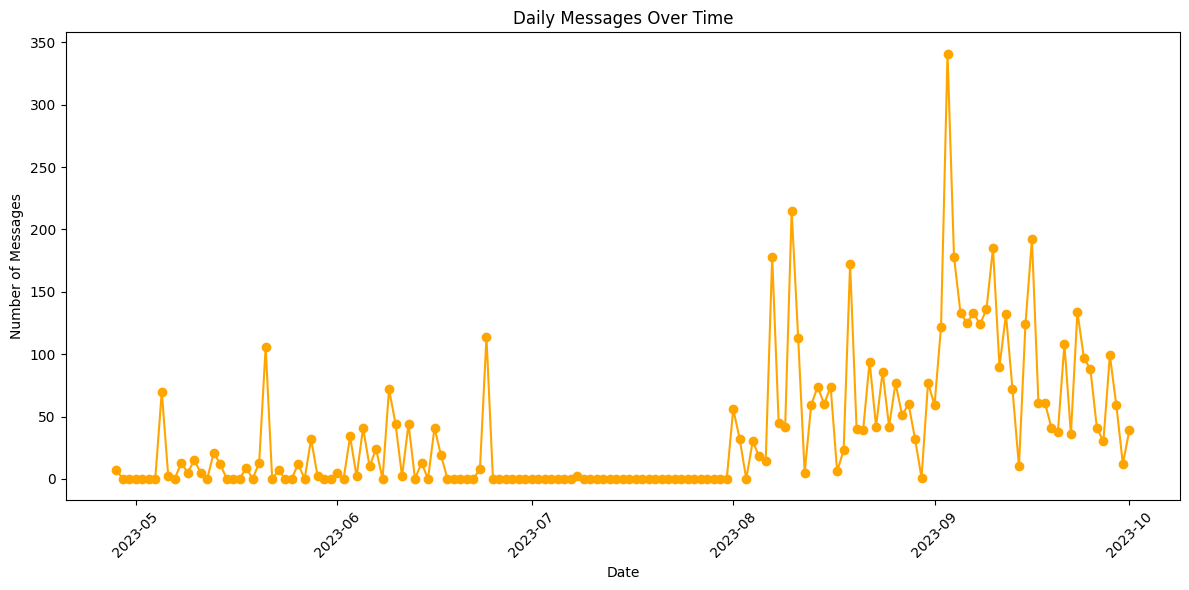

In [25]:


# Resample the data to group by day and count the number of messages for each day
daily_message_counts = df.resample('D').count()

# Create a plot using Seaborn
plt.figure(figsize=(12, 6))
plt.plot(daily_message_counts.index, daily_message_counts['Message'], marker='o', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Daily Messages Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Since the Most messages was in September We analyze 
## Number of messages sent day wise in Setptember

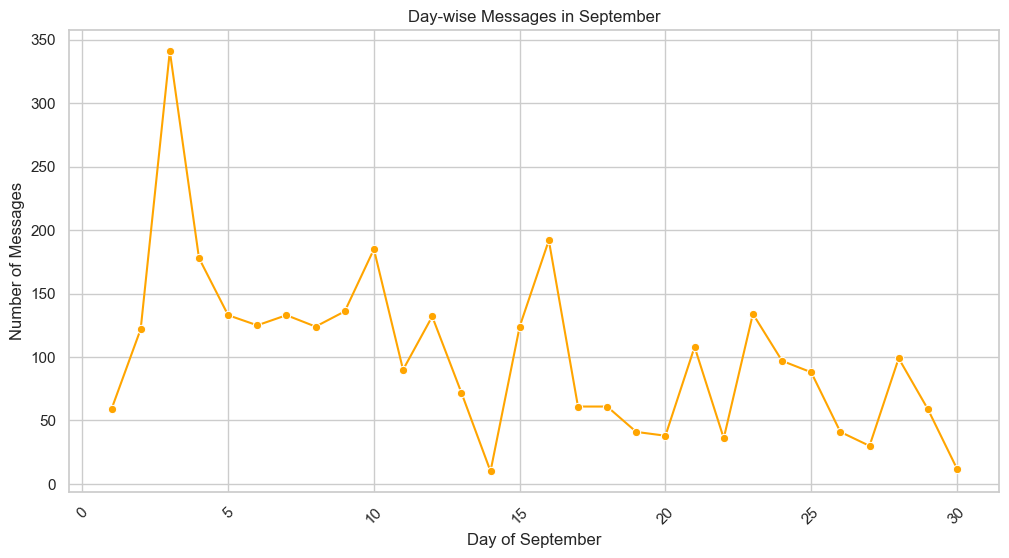

In [26]:
# Filter the DataFrame to include only data for September
september_data = df[(df.index.month == 9)]

# Resample the data to group by day and count the number of messages for each day
daily_message_counts = september_data.resample('D').count()

# Create a plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=daily_message_counts, x=daily_message_counts.index.day, y='Message', marker='o', color ='orange')
plt.xlabel('Day of September')
plt.ylabel('Number of Messages')
plt.title('Day-wise Messages in September')
plt.xticks(rotation=45)
plt.show()


## The day with most messages was 2023-09-03 with 341 messages.
## So it would be better for displaying the messages on that day

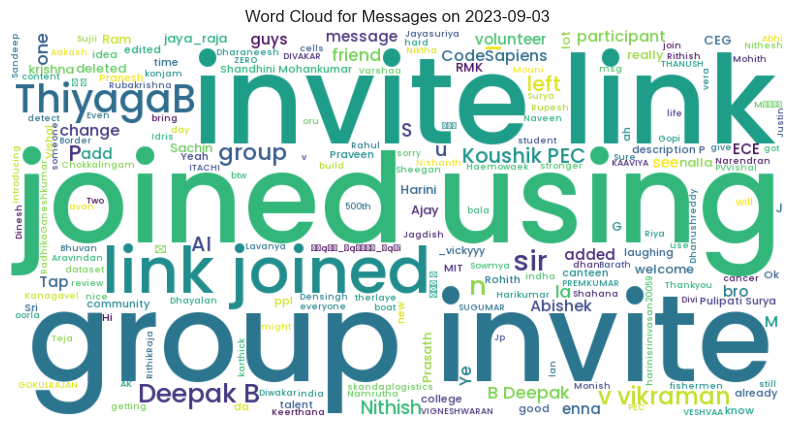

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Filter the DataFrame for messages on the day with the most messages (2023-09-03)
date_with_most_messages = '2023-09-03'
filtered_df = df[df.index.date == pd.to_datetime(date_with_most_messages).date()]

# Extract the message text from the filtered DataFrame
messages = filtered_df['Message']

# Combine all messages into a single string
message_text = ' '.join(messages)

# Create a WordCloud object without specifying a font
wordcloud = WordCloud(
    font_path='Poppins/Poppins-Medium.ttf',
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS
).generate(message_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Messages on {date_with_most_messages}')
plt.show()


In [28]:
df.index

DatetimeIndex(['2023-04-28 11:02:30', '2023-04-28 11:02:30',
               '2023-04-28 11:03:11', '2023-04-28 11:06:18',
               '2023-04-28 11:08:21', '2023-04-28 11:09:16',
               '2023-04-28 11:09:37', '2023-05-05 11:58:40',
               '2023-05-05 00:40:18', '2023-05-05 02:50:31',
               ...
               '2023-10-01 00:36:42', '2023-10-01 00:36:31',
               '2023-10-01 00:37:17', '2023-10-01 00:37:35',
               '2023-10-01 00:43:13', '2023-10-01 01:32:54',
               '2023-10-01 01:57:53', '2023-10-01 01:58:48',
               '2023-10-01 01:59:34', '2023-10-01 02:19:39'],
              dtype='datetime64[ns]', name='Datetime', length=5763, freq=None)

C:\Users\imyad\AppData\Local\Temp\ipykernel_18512\404231117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df.index.hour


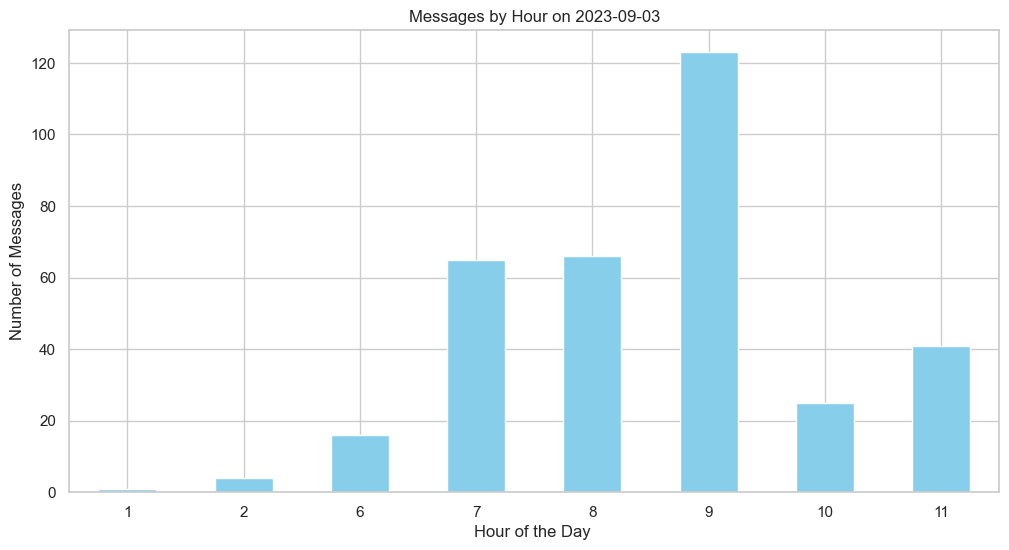

In [29]:
# Filter the DataFrame for messages on the day with the most messages (2023-09-03)
date_with_most_messages = '2023-09-03'
filtered_df = df[df.index.date == pd.to_datetime(date_with_most_messages).date()]

# Extract the hour from the Datetime index
filtered_df['Hour'] = filtered_df.index.hour

# Group by hour and count the number of messages in each hour
hourly_message_counts = filtered_df.groupby('Hour').size()

# Create a bar chart to visualize the count of messages by hour
plt.figure(figsize=(12, 6))
hourly_message_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day ')
plt.ylabel('Number of Messages')
plt.title(f'Messages by Hour on {date_with_most_messages}')
plt.xticks(rotation=0)

plt.show()


## Analyzing the day with No messages

In [30]:

# Find the minimum and maximum dates in your DataFrame
min_date = df.index.min()
max_date = df.index.max()

# Create a list of all days within the date range of your DataFrame
all_days = pd.date_range(min_date, max_date).date

# Get the days with messages from the DataFrame's index
days_with_messages = df.index.date

# Find the days with no messages
days_with_no_messages = [day for day in all_days if day not in days_with_messages]

print("Days with no messages:")
print(days_with_no_messages)


Days with no messages:
[datetime.date(2023, 4, 29), datetime.date(2023, 4, 30), datetime.date(2023, 5, 1), datetime.date(2023, 5, 2), datetime.date(2023, 5, 3), datetime.date(2023, 5, 4), datetime.date(2023, 5, 7), datetime.date(2023, 5, 12), datetime.date(2023, 5, 15), datetime.date(2023, 5, 16), datetime.date(2023, 5, 17), datetime.date(2023, 5, 19), datetime.date(2023, 5, 22), datetime.date(2023, 5, 24), datetime.date(2023, 5, 25), datetime.date(2023, 5, 27), datetime.date(2023, 5, 30), datetime.date(2023, 5, 31), datetime.date(2023, 6, 2), datetime.date(2023, 6, 8), datetime.date(2023, 6, 13), datetime.date(2023, 6, 15), datetime.date(2023, 6, 18), datetime.date(2023, 6, 19), datetime.date(2023, 6, 20), datetime.date(2023, 6, 21), datetime.date(2023, 6, 22), datetime.date(2023, 6, 25), datetime.date(2023, 6, 26), datetime.date(2023, 6, 27), datetime.date(2023, 6, 28), datetime.date(2023, 6, 29), datetime.date(2023, 6, 30), datetime.date(2023, 7, 1), datetime.date(2023, 7, 2), datet

## Displaying what we inferred before as graph

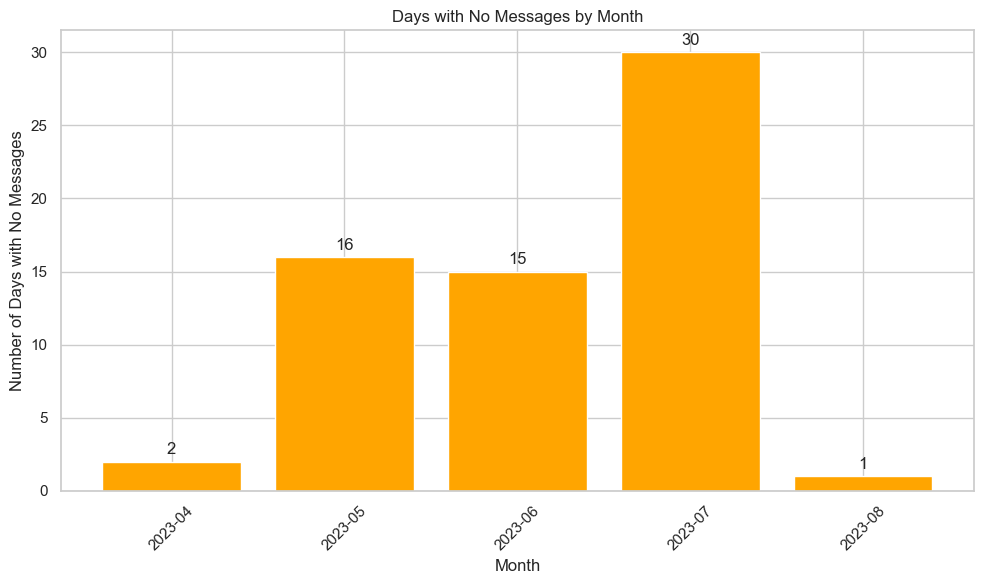

In [31]:
# Convert the list to a Pandas DataFrame
df_no_messages = pd.DataFrame({'Date': days_with_no_messages})

# Extract month and year from each date
df_no_messages['Month'] = df_no_messages['Date'].apply(lambda x: x.strftime('%Y-%m'))

# Group by month and count occurrences
monthly_counts = df_no_messages['Month'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_counts.index, monthly_counts.values, color='orange')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Days with No Messages')
plt.title('Days with No Messages by Month')

# Add count annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [32]:
# Group the data by month and count messages
monthly_counts = df.resample('M').count()['Message']

# Calculate the cumulative sum
cumulative_sum = monthly_counts.cumsum()


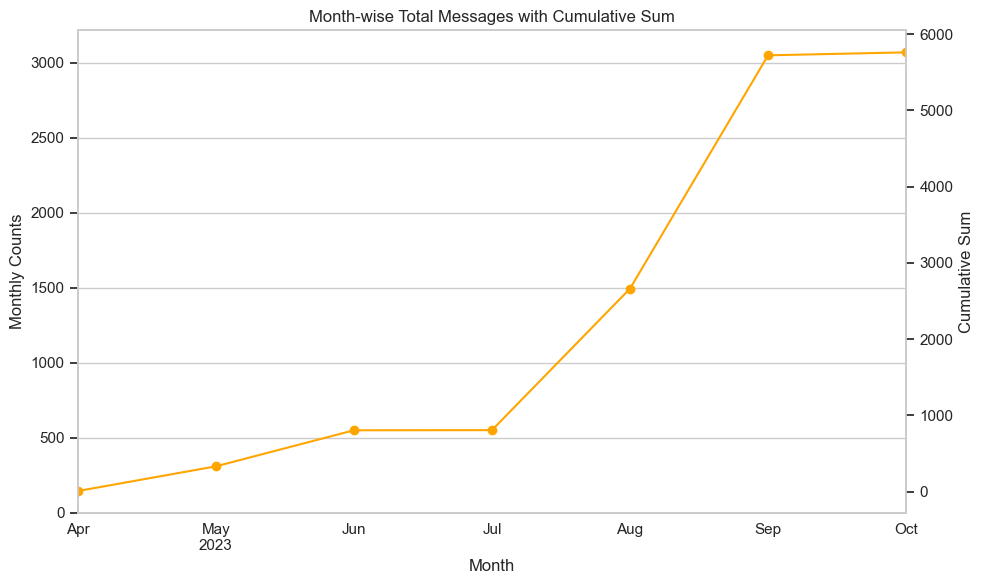

In [33]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the monthly counts
monthly_counts.plot(kind='bar', ax=ax, label='Monthly Counts', color='skyblue', alpha=0.7)

# Plot the cumulative sum as a line
cumulative_sum.plot(secondary_y=True, ax=ax, marker='o', color='orange', label='Cumulative Sum')

# Set labels and legend
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Counts')
ax.right_ax.set_ylabel('Cumulative Sum')

# Display the plot
plt.title('Month-wise Total Messages with Cumulative Sum')
plt.tight_layout()
plt.show()


## Making the Feature 'Message' meaningful

In [34]:
## Displaying the message feature
df['Message']

Datetime
2023-04-28 11:02:30    CodeSapiens - Code 'Seivom': ‎Messages and cal...
2023-04-28 11:02:30    Product Manager: ‎Product Manager created this...
2023-04-28 11:03:11    CodeSapiens - Code 'Seivom': ‎Product Manager ...
2023-04-28 11:06:18    CodeSapiens - Code 'Seivom': ‎You changed this...
2023-04-28 11:08:21    CodeSapiens - Code 'Seivom': ‎You changed the ...
                                             ...                        
2023-10-01 01:32:54           ‪+91 99441 40269‬: ‎‪+91 99441 40269‬ left
2023-10-01 01:57:53    ~ Mr.Coder: enakum athala pudikathu sir..so pr...
2023-10-01 01:58:48                           ~ Mr.Coder: kandipaaga sir
2023-10-01 01:59:34                                 ~ Mr.Coder: fine sir
2023-10-01 02:19:39    ‪+91 93610 85806‬: ‎‪+91 93610 85806‬ joined u...
Name: Message, Length: 5763, dtype: object

In [35]:
# Extract data after ':' in all records of the 'Message' column
df['Message'] = df['Message'].str.split(': ').str[-1]

## Finding Number of Unique Words Used

In [36]:
from collections import Counter

messages = df['Message']

# Number of Unique Words Used
unique_words = set(" ".join(messages).split())
num_unique_words = len(unique_words)
print(f"Number of Unique Words Used: {num_unique_words}")

Number of Unique Words Used: 11727


## Finding the most commonly used word

In [37]:
# Most Commonly Used Word
word_counts = Counter(" ".join(messages).split())
most_common_word, most_common_word_count = word_counts.most_common(1)[0]
print(f"Most Commonly Used Word: '{most_common_word}' (Used {most_common_word_count} times)")


Most Commonly Used Word: 'this' (Used 1197 times)


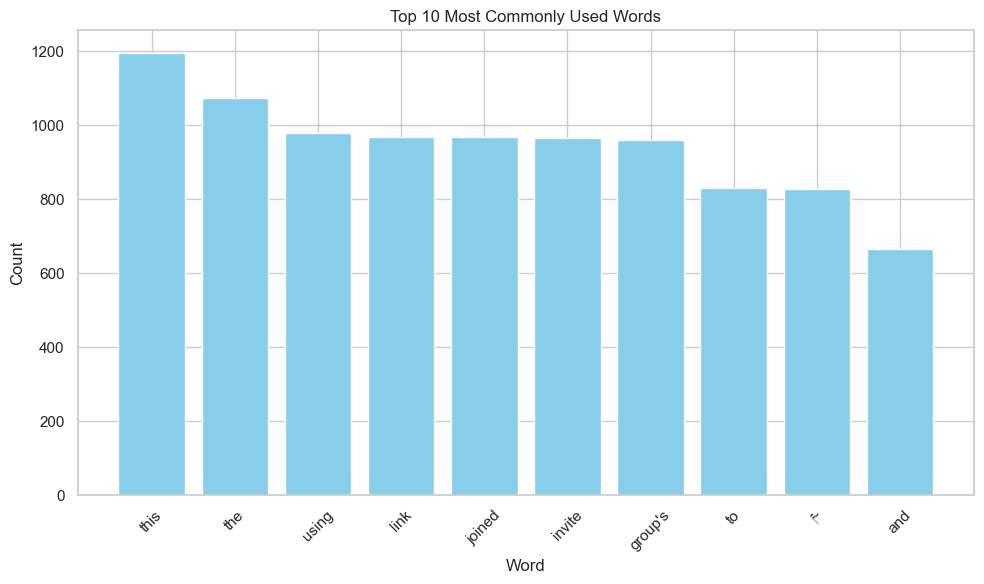

In [38]:
from collections import Counter

# Combine all messages into a single string
message_text = ' '.join(messages)

# Tokenize the message text (split it into words)
words = message_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Find the top 10 most commonly used words
top_10_words = word_counts.most_common(10)

# Create a DataFrame for the top 10 words
df_top_words = pd.DataFrame(top_10_words, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_top_words['Word'], df_top_words['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 10 Most Commonly Used Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Finding the longest message sent and the user who sent it

In [39]:
# Calculate the length of each message
df['Message_Length'] = df['Message'].str.len()

# Find the index of the row with the longest message
index_of_longest_message = df['Message_Length'].idxmax()

# Get the username and message text of the longest message
longest_message_username = df.loc[index_of_longest_message, 'Username/Number']
longest_message_text = df.loc[index_of_longest_message, 'Message']

print(f"Username of Longest Message: {longest_message_username}")
print(f"Longest Message: {longest_message_text}")


Username of Longest Message: ~ Pharaoh Suriya
Longest Message: If you ask me, I do think it's one of the basic results of evolution at play. And humans especially have knowledge that gets passed on beyond generations other than through genetics by something called culture. This is an extremely powerful tool as the only thing that a living thing is concerned with seems to be the survival of its kind and so will be willing to do anything to achieve that and that thing is generally termed intelligence. So when we see something that we know is going to make us live longer or help us reproduce, it checks in for things necessary to survive by our genetic material whose only purpose is to continue existing. So, we tend to do such things and keep it in higher regard. For example, ancient humans saw forest fire and how animals that got cooked in them tasted and how they were better because they won't cause much diseases as the bacteria will be destroyed by heat and that became an incentive to l

## Displaying the Top 10 Longest messages

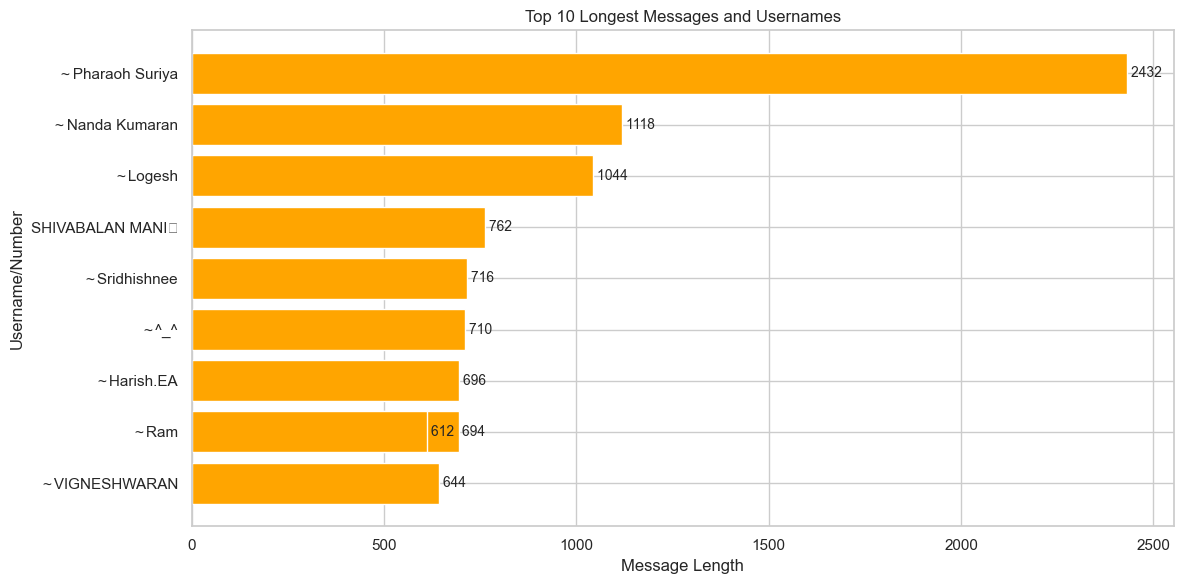

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by message length in descending order
df_sorted = df.sort_values(by='Message_Length', ascending=False)

# Select the top 10 longest messages and usernames
top_10_longest = df_sorted.head(10)

# Create a bar chart to display the top 10 longest messages and usernames
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_longest['Username/Number'], top_10_longest['Message_Length'], color='orange')
plt.xlabel('Message Length')
plt.ylabel('Username/Number')
plt.title('Top 10 Longest Messages and Usernames')
plt.gca().invert_yaxis()  # Invert the y-axis to display the longest message at the top

# Add message lengths on top of the bars
for bar, length in zip(bars, top_10_longest['Message_Length']):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{length} ', va='center', fontsize=10)

plt.tight_layout()
plt.show()


## Analyzing the links shared in chat

In [49]:
import re


# Define a regular expression pattern to match URLs
url_pattern = r'https?://\S+|www\.\S+'

# Function to extract URLs from a text
def extract_urls(text):
    return re.findall(url_pattern, text)

# Apply the function to extract URLs from the 'Message' column
df['Links'] = df['Message'].apply(extract_urls)

# Create a new DataFrame to store the links alone
links_df = pd.DataFrame({'Links': df['Links'].explode().dropna()})

links_df.head()


,Links
Datetime,
2023-05-05 03:58:15,https://chat.whatsapp.com/Hk6NqyvuB6P49LuRmu8PqB
2023-05-05 06:25:01,https://youtu.be/zDAYZU4A3w0
2023-05-08 10:34:21,https://takkunu-dfd27.web.app/
2023-05-11 07:08:45,https://www.geeksforgeeks.org/complete-roadmap...
2023-05-26 09:42:16,https://youtu.be/8J-V3J3CBes


In [53]:
# Assuming you have the 'Links' column in the 'links_df' DataFrame
# Extract the part of the links after '//' and before '/'
links_df['Extracted Links'] = links_df['Links'].str.extract(r'//(.*?)/')

links_df.head()

,Links,Extracted Links
Datetime,,
2023-05-05 03:58:15,https://chat.whatsapp.com/Hk6NqyvuB6P49LuRmu8PqB,chat.whatsapp.com
2023-05-05 06:25:01,https://youtu.be/zDAYZU4A3w0,youtu.be
2023-05-08 10:34:21,https://takkunu-dfd27.web.app/,takkunu-dfd27.web.app
2023-05-11 07:08:45,https://www.geeksforgeeks.org/complete-roadmap...,www.geeksforgeeks.org
2023-05-26 09:42:16,https://youtu.be/8J-V3J3CBes,youtu.be


In [54]:
links_df['Extracted Links'].value_counts()

Extracted Links
youtube.com                    13
instagram.com                  10
www.youtube.com                 5
youtu.be                        5
www.instagram.com               5
chat.whatsapp.com               4
www.indiatoday.in               2
internshala.com                 2
www.producthunt.com             1
medium.com                      1
x.com                           1
ig.me                           1
spotify.link                    1
play.google.com                 1
www.linkedin.com                1
icml.cc                         1
vtopcc6.vit.ac.in               1
www.collegeevents.info          1
devdocs.io                      1
www.knowafest.com               1
towardsdatascience.com          1
forms.gle                       1
t.me                            1
hnm.lumoscit.in                 1
about.fb.com                    1
pravartak.org.in                1
www.businesstoday.in            1
www.cloudskillsboost.google     1
www.apple.com                   

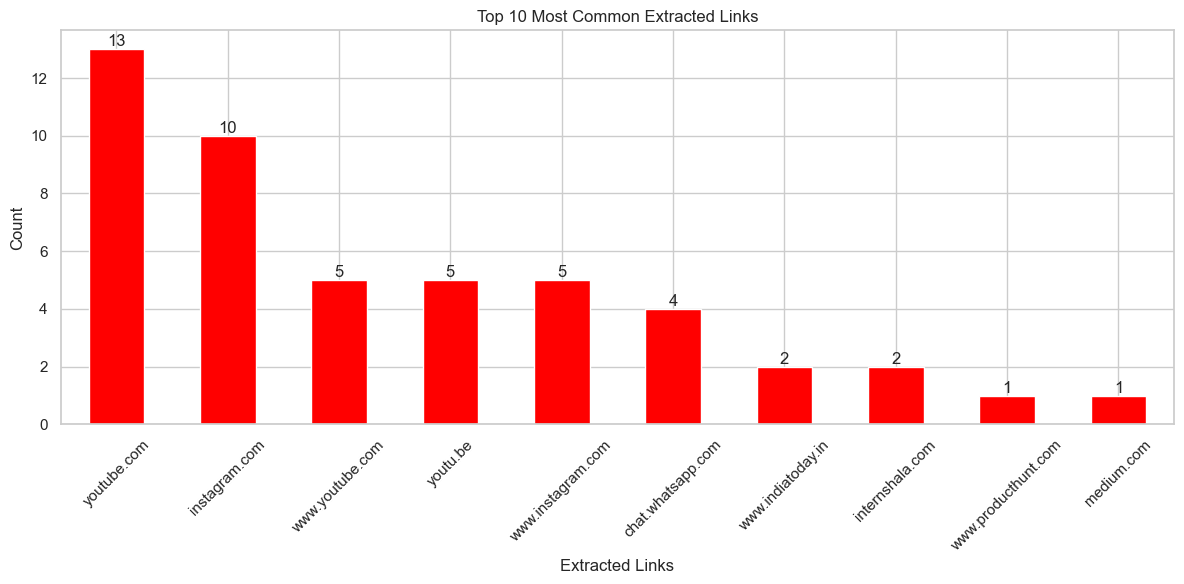

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'Extracted Links' column in the 'links_df' DataFrame
# Count the occurrences of each extracted link
link_counts = links_df['Extracted Links'].value_counts()

# Select the top 10 most common extracted links
top_10_links = link_counts.head(10)

# Create a bar chart to visualize the top 10 extracted links
plt.figure(figsize=(12, 6))
ax = top_10_links.plot(kind='bar', color='red')
plt.xlabel('Extracted Links')
plt.ylabel('Count')
plt.title('Top 10 Most Common Extracted Links')
plt.xticks(rotation=45)

# Display the count on top of each bar
for i, count in enumerate(top_10_links):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## ANDDD Here Comes the interesting part.....(Sentiment Analysis on each message)

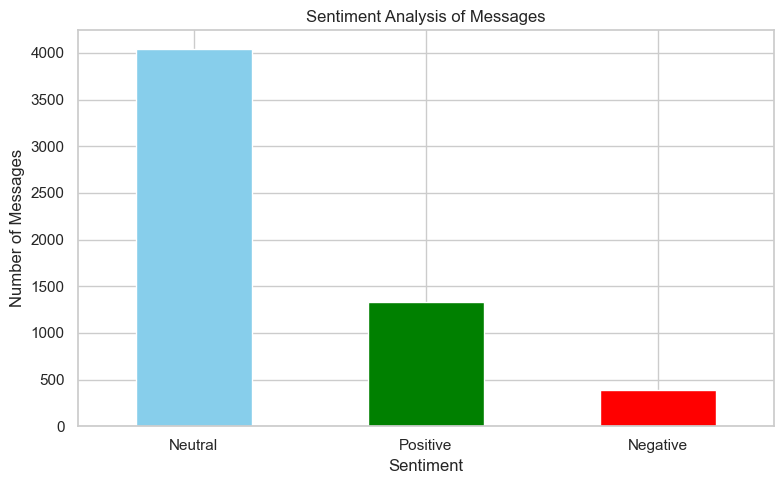

In [43]:
from textblob import TextBlob

# Create a function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

# Apply the sentiment analysis function to your DataFrame
df['Sentiment'] = df['Message'].apply(analyze_sentiment)

# Count the number of messages in each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Define custom colors for each sentiment category
colors = {'Positive': 'green', 'Neutral': 'skyblue', 'Negative': 'red'}

# Create a bar chart with custom colors
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=[colors[sentiment] for sentiment in sentiment_counts.index])
plt.xlabel('Sentiment')
plt.ylabel('Number of Messages')
plt.title('Sentiment Analysis of Messages')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [44]:
df.head()

,Username/Number,Message,Message_Length,Links,Sentiment
Datetime,,,,,
2023-04-28 11:02:30,CodeSapiens - Code 'Seivom',‎Messages and calls are end-to-end encrypted. ...,121,[],Neutral
2023-04-28 11:02:30,Product Manager,‎Product Manager created this group,35,[],Neutral
2023-04-28 11:03:11,CodeSapiens - Code 'Seivom',‎Product Manager added you,26,[],Neutral
2023-04-28 11:06:18,CodeSapiens - Code 'Seivom',‎You changed this group's icon,30,[],Neutral
2023-04-28 11:08:21,CodeSapiens - Code 'Seivom',‎You changed the group name to “CodeSapiens - ...,57,[],Neutral


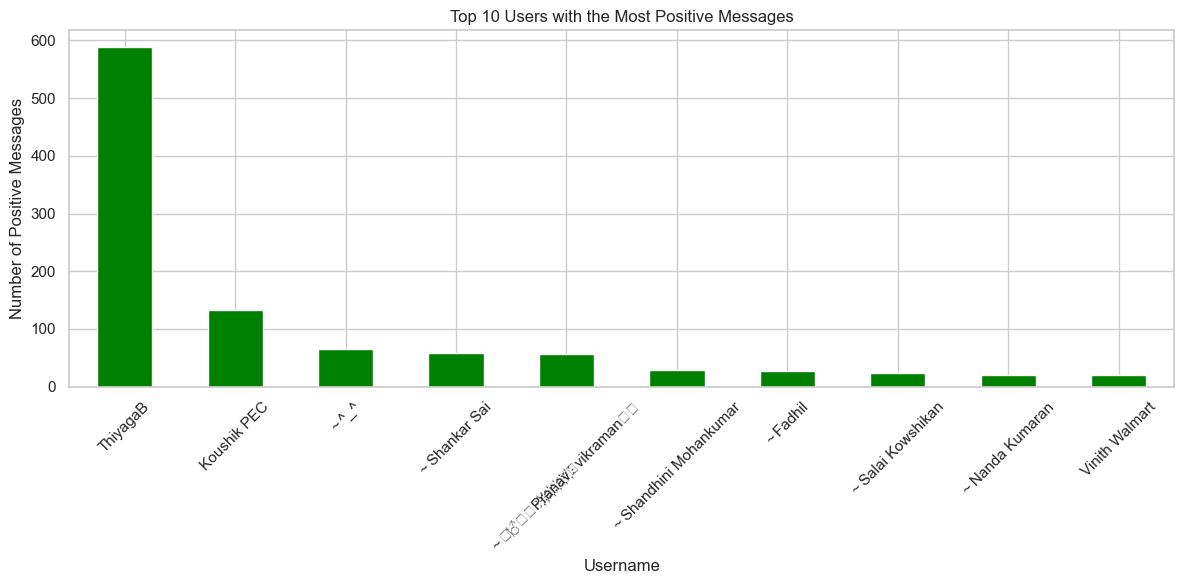

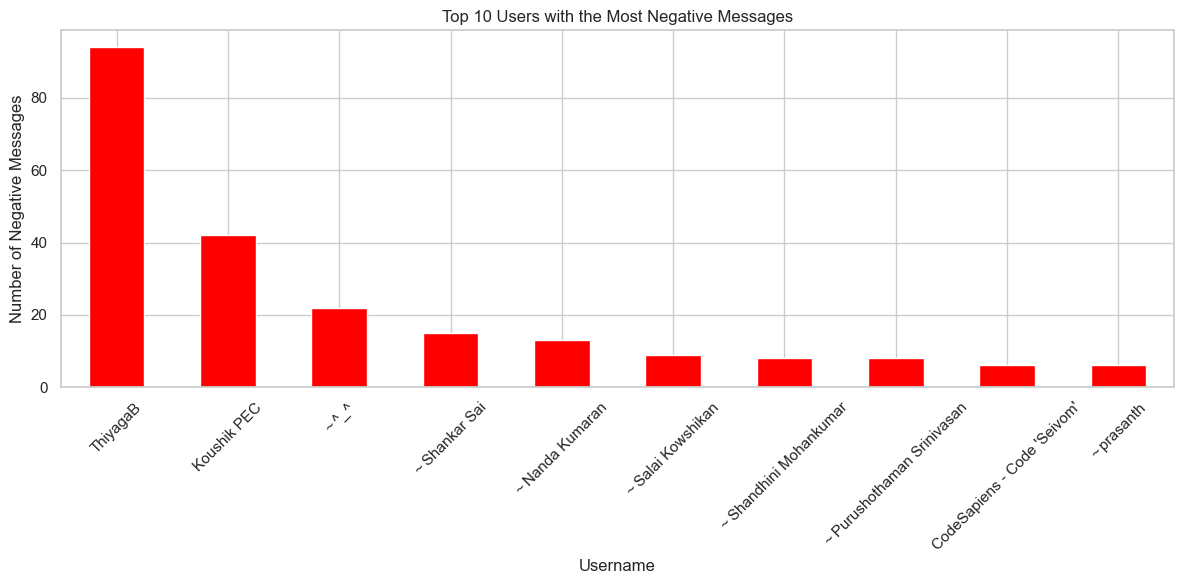

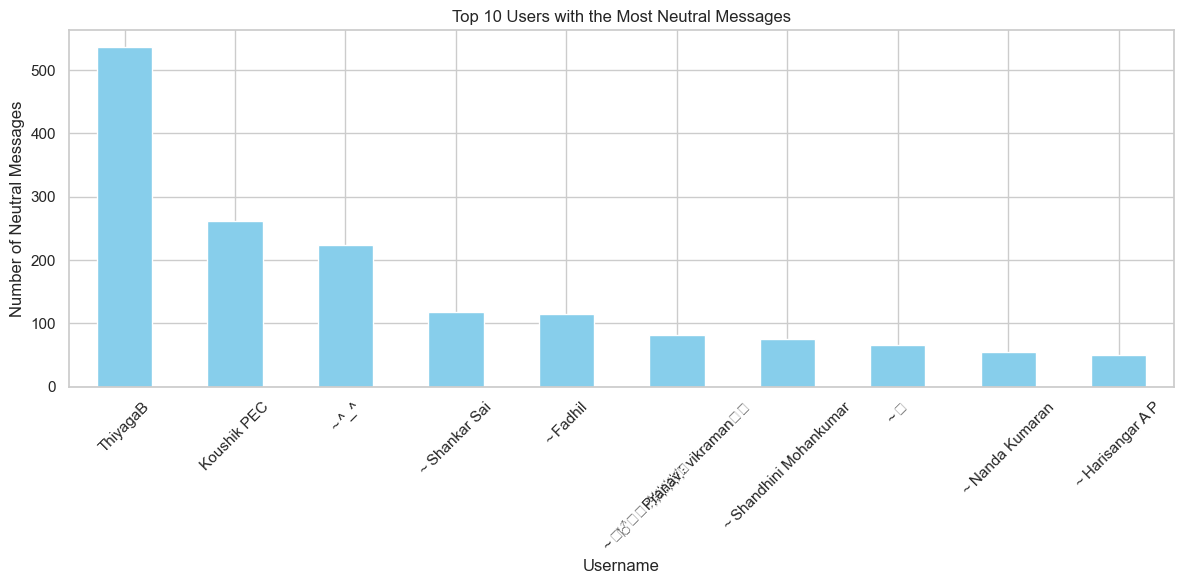

In [45]:
# Group messages by 'Username' and 'Sentiment', then count the number of messages in each group
sentiment_counts = df.groupby(['Username/Number', 'Sentiment']).size().unstack(fill_value=0)

# Calculate the total positive, negative, and neutral messages for each user
sentiment_counts['Total Positive'] = sentiment_counts['Positive']
sentiment_counts['Total Negative'] = sentiment_counts['Negative']
sentiment_counts['Total Neutral'] = sentiment_counts['Neutral']

# Sort users by total positive, negative, and neutral messages and select the top 10
top_10_positive_users = sentiment_counts['Total Positive'].sort_values(ascending=False).head(10)
top_10_negative_users = sentiment_counts['Total Negative'].sort_values(ascending=False).head(10)
top_10_neutral_users = sentiment_counts['Total Neutral'].sort_values(ascending=False).head(10)

# Create separate bar charts for the top 10 positive, negative, and neutral users

# Bar chart for top 10 users with the most Positive messages
plt.figure(figsize=(12, 6))
top_10_positive_users.plot(kind='bar', color='green')
plt.xlabel('Username')
plt.ylabel('Number of Positive Messages')
plt.title('Top 10 Users with the Most Positive Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for top 10 users with the most Negative messages
plt.figure(figsize=(12, 6))
top_10_negative_users.plot(kind='bar', color='red')
plt.xlabel('Username')
plt.ylabel('Number of Negative Messages')
plt.title('Top 10 Users with the Most Negative Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for top 10 users with the most Neutral messages
plt.figure(figsize=(12, 6))
top_10_neutral_users.plot(kind='bar', color='skyblue')
plt.xlabel('Username')
plt.ylabel('Number of Neutral Messages')
plt.title('Top 10 Users with the Most Neutral Messages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Label Encoding the Sentiment data to numeric

In [46]:
# Create a mapping dictionary for sentiment labels
sentiment_mapping = {'Positive': 1, 'Negative': 0, 'Neutral': 2}

# Map the 'Sentiment' column to numeric values using the mapping dictionary
df['Sentiment_Numeric'] = df['Sentiment'].map(sentiment_mapping)

# Now, df['Sentiment_Numeric'] will contain numeric labels (1 for Positive, 0 for Negative, 2 for Neutral)


In [47]:
df.head()

,Username/Number,Message,Message_Length,Links,Sentiment,Sentiment_Numeric
Datetime,,,,,,
2023-04-28 11:02:30,CodeSapiens - Code 'Seivom',‎Messages and calls are end-to-end encrypted. ...,121,[],Neutral,2
2023-04-28 11:02:30,Product Manager,‎Product Manager created this group,35,[],Neutral,2
2023-04-28 11:03:11,CodeSapiens - Code 'Seivom',‎Product Manager added you,26,[],Neutral,2
2023-04-28 11:06:18,CodeSapiens - Code 'Seivom',‎You changed this group's icon,30,[],Neutral,2
2023-04-28 11:08:21,CodeSapiens - Code 'Seivom',‎You changed the group name to “CodeSapiens - ...,57,[],Neutral,2


# Analyzing if Message length and sentiment has correlation

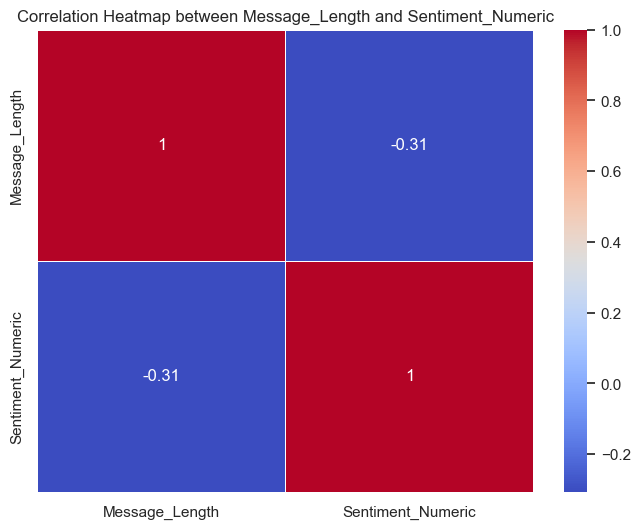

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['Message_Length', 'Sentiment_Numeric']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap between Message_Length and Sentiment_Numeric')
plt.show()
